In [1]:
### Figure 2F for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
# Set up a random seed
np.random.seed(42)

In [34]:
# Import the A549 gene level profiles & hits from the hit calling process then subset the gene level profiles for all hits 
# Download files described in README.md and add the folder address
df = pd.read_csv('(FOLDER_ADDRESS)/20200805_A549_WG_Screen_guide_normalized_feature_select_merged_median_ALLBATCHES___CP186___ALLWELLS_gene_aggregated.csv.gz').set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
comp_spef_hits = pd.read_csv('../Fig2_A_B/a549_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../Fig2_A_B/a549_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hit_list = list(whole_cell_hits.index)
hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = df.loc[hit_list]
df_hits

,Cells_AreaShape_CentralMoment_0_1,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,Cells_AreaShape_HuMoment_6,Cells_AreaShape_NormalizedMoment_0_2,...,Nuclei_Texture_SumVariance_ConA_5_01_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_01_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_03_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
AARS,-0.045047,-0.017224,-0.072438,0.005527,-0.053934,0.153853,0.393330,-0.232846,0.002481,-0.314468,...,0.042180,-0.265725,-0.159218,0.071226,-0.074440,-0.002175,-0.083249,0.008703,-0.023501,-0.042191
AARS2,-0.051243,0.009448,0.026790,-0.043807,-0.012882,-0.232335,0.147636,-0.219370,0.002847,-0.347326,...,-0.353250,-0.279907,-0.332005,-0.075201,-0.003135,-0.015622,-0.047501,-0.237655,-0.188850,-0.149119
ABCB1,0.047199,0.006450,0.074548,0.003445,0.176262,0.375105,0.083015,0.048952,0.002811,-0.372090,...,-0.179690,-0.034004,0.049832,-0.030342,-0.129509,-0.141190,-0.115632,-0.113522,-0.112155,-0.135680
ABCC12,0.032234,-0.008989,0.022659,0.010388,0.075094,0.304862,0.353020,-0.173005,0.002669,-0.150201,...,-0.282898,-0.055039,-0.240565,-0.116965,-0.119747,-0.107041,-0.149995,-0.197220,-0.220073,-0.195365
ABCC6,0.081149,0.009756,0.008137,0.028262,0.419525,-0.055530,-0.133479,0.019405,0.002637,-0.106360,...,-0.406095,-0.039135,0.079254,-0.077007,-0.195710,-0.167745,-0.162812,-0.326115,-0.198072,-0.158630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF839,-0.066134,-0.018271,-0.024306,-0.062648,0.163565,-0.156702,0.393775,-0.087600,0.003056,-0.029900,...,-0.231338,-0.421132,-0.386149,-0.036153,-0.143302,-0.199990,-0.153215,-0.101859,0.028422,-0.097757
ZNHIT3,-0.107170,-0.002141,0.033646,0.004076,-0.076012,0.125035,0.180921,-0.289795,0.002928,0.136635,...,-0.466995,-0.572875,-0.293130,-0.097884,-0.082042,-0.021018,-0.049476,-0.225265,-0.273350,-0.190145
ZSCAN2,0.009568,-0.001156,0.010852,-0.013950,0.402135,-0.088981,0.046101,-0.057136,0.002899,0.062550,...,-0.444465,-0.378850,-0.389340,-0.060537,-0.205370,-0.236340,-0.165260,-0.277555,-0.208030,-0.232805


In [35]:
# Perform principal componenet analysis and select components representing 70% of variation in data & print the variation of components selected by PCA
pca = PCA()
pca.fit(df_hits)
x = list(pca.explained_variance_ratio_)
y = [sum(x[:i+1]) for i in range(len(x))]
y[139]

0.6973498212135203

In [36]:
# Perform principal componenet analysis and select components representing 70% of variation in data
pca = PCA(n_components=140)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
AARS,7.434398,2.780864,-1.407360,-1.689883,0.019111,1.136523,-1.180579,1.194372,-0.501910,-1.645746,...,0.584480,0.149514,-0.089948,-0.096518,0.567328,-0.123378,0.519216,0.202345,0.018392,0.461109
AARS2,1.892525,2.248619,0.595231,0.121060,-1.223101,-0.846461,-1.612035,-0.285005,-0.553107,0.143143,...,0.031114,-0.202559,-0.323858,0.089452,0.103769,0.903266,0.390651,0.285089,-0.119559,-0.332102
ABCB1,0.224974,-2.690149,-2.258545,0.378550,1.045632,0.312459,-0.011296,-0.891139,0.619971,0.665587,...,0.279046,-0.536914,-0.181417,-0.141040,0.252675,-0.321479,0.141128,-0.080897,0.232196,-0.036857
ABCC12,-3.206807,-0.364974,-1.729425,-1.624230,-0.156227,-0.335739,0.749696,-0.477993,0.502413,0.254754,...,0.173061,-0.100190,0.291659,0.097737,-0.192433,0.009617,0.073562,0.004196,-0.101414,-0.015778
ABCC6,-4.212142,1.796591,-0.614636,1.578801,0.357705,1.276777,0.404988,-0.780563,0.132643,-0.299698,...,0.345225,-0.051810,0.144667,0.253692,-0.150919,-0.367473,-0.092726,-0.348454,0.094405,-0.509928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF839,2.658035,-2.110374,-1.650350,1.772527,-1.860104,0.692989,0.997681,-0.289019,0.990044,0.205150,...,-0.183789,-0.022820,0.301595,-0.266866,-0.195705,0.052380,0.105643,-0.448188,-0.442441,-0.194117
ZNHIT3,-2.175620,-3.874622,2.621200,-0.765325,-0.213510,1.159837,-0.031951,-1.455350,-0.730404,0.528836,...,-0.485116,-0.262513,-0.034521,-0.297078,0.375642,0.095132,-0.057624,-0.112756,0.220397,-0.114285
ZSCAN2,-4.558926,-1.087092,-0.628261,1.683505,-0.750290,-0.961915,0.556749,1.335946,-0.655363,-0.363140,...,-0.120978,0.066459,-0.167670,-0.061292,0.093879,0.159749,0.123977,0.065345,-0.178752,-0.020121


In [69]:
# Perform UMAP dimentinality reduction to project data into a 2 dimentional plane 
clusterable_embedding = umap.UMAP(
    n_neighbors=3,#3
    min_dist=0.0,
    n_components=2,
    random_state=43,
    metric = 'cosine',
).fit_transform(df_hits_pca)

In [461]:
# Manually label highlighted hits  
overal_labels = [hit_list.index(i) if i in whole_cell_hit_list else -1 for i in hit_list ]
other_labels = [hit_list.index(i) if i not in whole_cell_hit_list else -1 for i in hit_list ]
highlight_list = [
                  # GOBP_ENZYME_LINKED_RECEPTOR_PROTEIN_SIGNALING_PATHWAY
                  'ENG', 'KIT', 'LGMN', 'NTRK3', 'PPARA', 'SH2B2', 'SLC33A1', 'SOCS5', 'DUSP22','GDF6','BMPR2',
                  # GOCC_RIBONUCLEOPROTEIN_COMPLEX 
                  'GNL3L', 'ABT1', 'DDX54', 'DIS3', 'DKC1','EXOSC10', 'FBL', 'ISG20L2', 'NAF1', 'NOP56', 'NSA2', 'PDCD11','PWP2','RCL1','RPL13A','RPL27',
                  'RUVBL2', 'TBL3','URB1', 'UTP3','RPS12','UPF2','MPHOSPH10', 'NOL11', 'NOP16', 'RRN3', 'RRP1', 'SDAD1','LAS1L','NOB1','PES1','RPL23A',
                  'RPL7L1','UBA52','CPSF3','RPL32','RPL31','RPL3','EIF6',
                  # GOBP_GLYCOSYLATION
                  'MAN1A2','NUS1','DAD1','B4GALT1','GMPPB','STT3A','MGAT1','ALG11','ST3GAL4','ALG9','DHDDS','DPM1','ENTPD5',
                  # GOBP_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS
                  'PPP2R5C','PSMA2','PSMD2','ANAPC4','OGT','PSMA5','PSMB7','PSMC3','PSMC4','PSMA4','ANAPC13','RBX1','PSMC5','PSMD6','PSMD3','PSMB2','PSMB3',
                  'UBE2S','RNFT2','PSMA3','GSK3A',
                  # GOBP_PROCESS_UTILIZING_AUTOPHAGIC_MECHANISM
                  'ATP5B','ATP6AP2','ATP6V0B','ATP6V0C','ATP6V0D1','ATP6V1A','ATP6V1B2','ATP6V1C1','ATP6V1D','ATP6V1E1','ATP6V1G1','VPS28','WDR81','VPS39',
                  'VPS51','VPS16','VPS18',
                  # GOCC_MITOCHONDRIAL_ENVELOPE
                  'AURKAIP1','COX17','IKBKE','MRPL9','NDUFB4','FBXL4','FZD9','HSPA9','MRPS22','NDUFS1','PMPCB','CYC1','MPV17L2','MRPL34','TMEM126B','PHB2',
                  'NDUFA8','CYCS','VDAC3','GFER',
                  # GOBP_RRNA_METABOLIC_PROCESS
                  'FCF1','DDX10','DHX37','DIMT1','NCL','NOC4L','NOP58','RIOK2','RPS17','TRMT10C','NHP2','WDR36','WDR74','NGDN','UTP6','EBNA1BP2','NOL10',
                  'RPL12','WDR3','EMG1','NOP2','NVL','TSR1','EXOSC6','EXOSC7','ERCC2','ZNHIT3','GTPBP4','XRN2',
                  # GOBP_MRNA_PROCESSING
                  'LSM6','PLRG1','PRMT5','PRPF40B','TSEN15','UBL5','ZNF473','HSPA8','RNF40','YTHDC1','PRPF6','LUC7L3',
                  # GOBP_REGULATION_OF_GTPASE_ACTIVITY
                  'ADAP2','CAV2','SH3BP4','SNX9','ARHGEF7','BCL6','EZH2','ADPRH','TAX1BP3','RGS11','SOD1',
                  # GOBP_TRANSLATIONAL_INITIATION
                  'EIF3D','EIF4A1','TPR','EIF3CL','EIF3G','EIF3I','EIF4H','EIF3B','NCBP2']

highlight_labels = [hit_list.index(i) if i in highlight_list else -1 for i in hit_list ]
len(overal_labels)-other_labels.count(-1)

2309

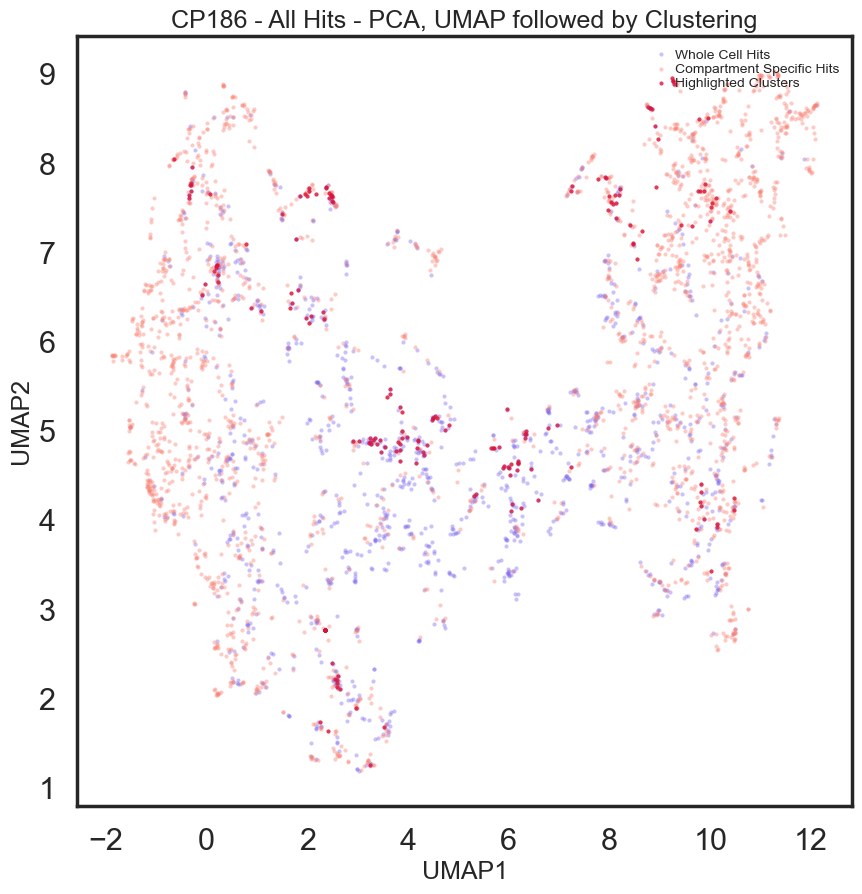

In [462]:
# Draw the representation of the data and color code based on the type of hit. Save the Fig 2F. 
plt.figure(figsize=(10, 10))

plt.scatter(clusterable_embedding[overal_labels, 0],
            clusterable_embedding[overal_labels, 1],
            c='mediumslateblue',#firebrick
            s=1,
            alpha=0.4,
           # cmap='Spectral'
           );

plt.scatter(clusterable_embedding[other_labels, 0],
            clusterable_embedding[other_labels, 1],
            c='salmon',#royalblue burlywood
            s=1,
            alpha=0.4,
           # cmap='Spectral'
           );

plt.scatter(clusterable_embedding[highlight_labels, 0],
            clusterable_embedding[highlight_labels, 1],
            c='crimson',#royalblue burlywood
            s=1,
            alpha=0.8,
           # cmap='Spectral'
           );

plt.title('CP186 - All Hits - PCA, UMAP followed by Clustering',fontsize=18)

plt.xlabel('UMAP1',fontsize=18)
plt.ylabel('UMAP2',fontsize=18)
plt.legend(labels=['Whole Cell Hits','Compartment Specific Hits','Highlighted Clusters'],loc="upper right",bbox_to_anchor=(1,1), frameon=False, ncol=1,fontsize=10 ,labelspacing=0.1,handletextpad=0)# 


plt.savefig('Fig2_F_A549_UMAP_clustering.png',bbox_inches='tight', dpi=600,facecolor='w', edgecolor='w')